# Report Analysis VIII

## Identificando e Removendo Outliers

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14, 5))

In [3]:
df = pd.read_csv('dados/aluguel_residential.csv', sep=';')

In [4]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor por metro quadrado,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,17.14,Apartamento


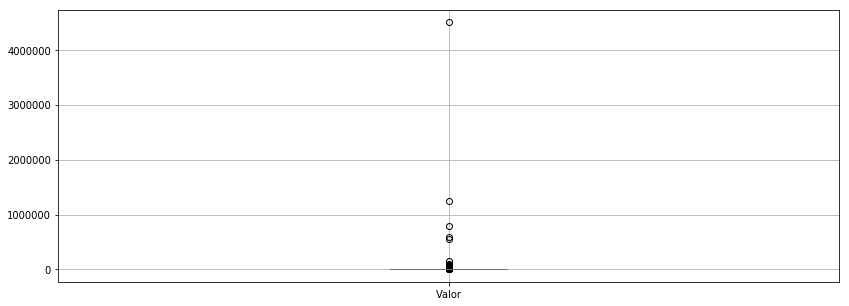

In [6]:
df.boxplot(['Valor'])

In [8]:
df[df['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor por metro quadrado,Tipo Agregado
7888,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
11004,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Apartamento
13090,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
14316,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
16047,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [9]:
valor = df['Valor']

In [10]:
type(valor)

pandas.core.series.Series

In [14]:
q1 = valor.quantile(.25)
q3 = valor.quantile(.75)
iiq = q3 - q1
limite_inferior = q1 - 1.5 * iiq
limite_superior = q3 + 1.5 * iiq

In [15]:
selection = (df['Valor'] >= limite_inferior) & (df['Valor'] <= limite_superior)

In [16]:
type(selection)

pandas.core.series.Series

In [18]:
dados_new = df[selection]
dados_new

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor por metro quadrado,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,17.14,Apartamento
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Apartamento
8,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0,33.33,Apartamento
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
10,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento


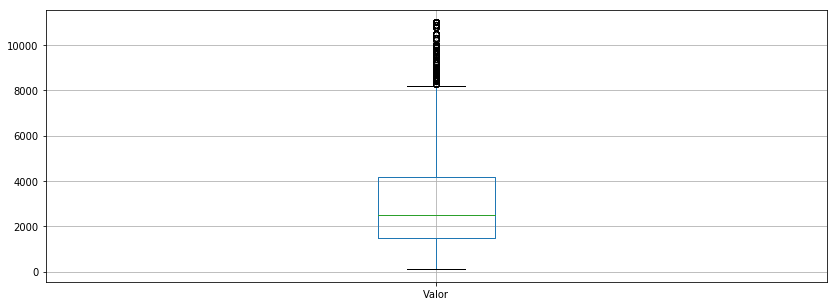

In [19]:
dados_new.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fa8eb38>]],
      dtype=object)

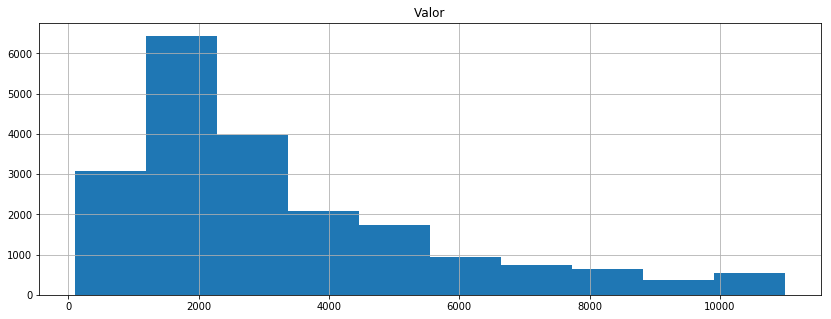

In [20]:
dados_new.hist(['Valor'])

## Identificando e Removendo Outliers

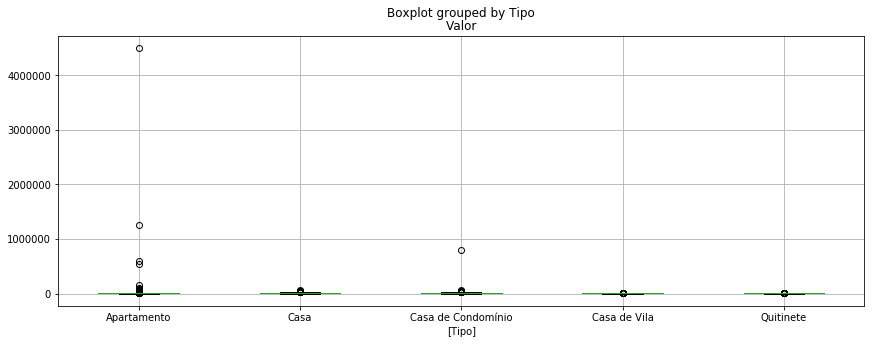

In [21]:
df.boxplot(['Valor'], by=['Tipo'])

In [30]:
grupo_tipo = df.groupby('Tipo')['Valor']

In [31]:
type(grupo_tipo)

pandas.core.groupby.groupby.SeriesGroupBy

In [32]:
grupo_tipo.groups

{'Apartamento': Int64Index([    2,     3,     4,     5,     8,     9,    10,    11,    13,
                15,
             ...
             22558, 22559, 22561, 22562, 22563, 22564, 22566, 22568, 22569,
             22570],
            dtype='int64', length=19525),
 'Casa': Int64Index([    1,    24,    56,    59,    99,   103,   149,   165,   187,
               247,
             ...
             22323, 22348, 22356, 22411, 22416, 22443, 22501, 22526, 22538,
             22549],
            dtype='int64', length=965),
 'Casa de Condomínio': Int64Index([    6,     7,    14,    18,    44,    60,   171,   173,   190,
               216,
             ...
             22453, 22455, 22463, 22497, 22508, 22509, 22527, 22536, 22546,
             22565],
            dtype='int64', length=996),
 'Casa de Vila': Int64Index([   84,   221,   229,   313,   342,   717,   845,   867,   942,
              1041,
             ...
             21913, 21918, 21982, 22058, 22087, 22100, 22329, 22378, 22460

In [33]:
q1 = grupo_tipo.quantile(.25)
q3 = grupo_tipo.quantile(.75)
iiq = q3 - q1
limite_inferior = q1 - 1.5 * iiq
limite_superior = q3 + 1.5 * iiq

In [35]:
limite_superior['Casa']

22850.0

In [42]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = df['Tipo'] == tipo
    eh_dentro_limite = (df['Valor'] >= limite_inferior[tipo]) & (df['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = df[selection]
    dados_new = pd.concat([dados_new, dados_selecao])

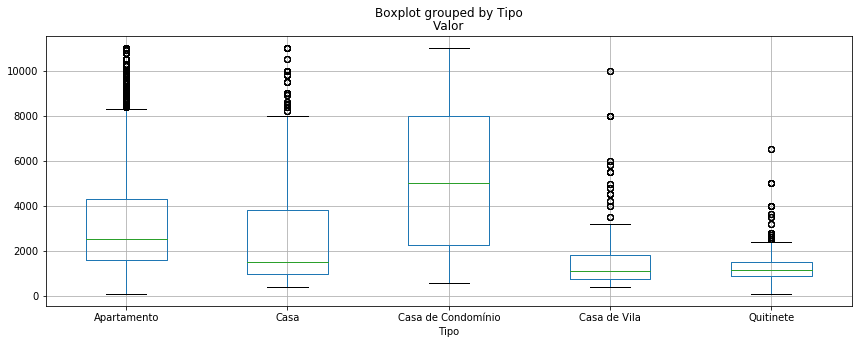

In [44]:
dados_new.boxplot(['Valor'], by='Tipo')

In [45]:
dados_new.to_csv('dados/aluguel_residential_sem_outliers.csv', sep=';', index=False)